# Preprocessing phase.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import requests
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('titanic-passengers.csv',encoding="ISO-8859-1",sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
##Data description:  
# Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
# Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# Name - Name
# Sex - Sex
# Age - Age
# Sibsp - Number of Siblings/Spouses Aboard
# Parch - Number of Parents/Children Aboard
# Ticket - Ticket Number
# Fare - Passenger Fare
# Cabin - Cabin
# Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
#Cleaning the data from outliers
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df = df.drop(columns="Cabin")
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [5]:
df["Pclass"].unique()

array([2, 3, 1], dtype=int64)

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
df["Age"].unique()

array([28.  , 25.  , 20.  , 29.  , 31.  , 37.  , 19.  ,  1.  , 20.5 ,
       42.  , 24.  , 48.  , 17.  , 27.  , 32.  , 38.  , 45.  , 30.5 ,
       41.  , 60.  , 50.  , 30.  , 40.  , 34.  , 36.  ,  3.  , 16.  ,
        7.  , 23.  , 44.  , 70.5 , 22.  , 26.  , 35.  ,  0.67, 62.  ,
       43.  , 18.  , 33.  ,  2.  , 39.  , 55.  , 56.  , 59.  , 58.  ,
       65.  ,  9.  , 51.  , 54.  , 28.5 , 14.  , 13.  , 21.  , 46.  ,
        4.  , 49.  , 47.  , 74.  , 11.  , 36.5 ,  6.  , 55.5 , 14.5 ,
        5.  , 32.5 , 15.  ,  8.  , 57.  , 10.  , 40.5 , 34.5 ,  0.75,
       64.  , 63.  , 61.  , 80.  , 24.5 , 66.  ,  0.83, 71.  , 45.5 ,
       52.  , 70.  ,  0.92, 53.  ,  0.42, 12.  , 23.5 ])

In [8]:
df["Survived"].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df["Pclass"].unique()

array([2, 3, 1], dtype=int64)

In [10]:
df['Family'] = df.Parch + df.SibSp
df['Family'].loc[df['Family']>0] = 'With'
df['Family'].loc[df['Family'] == 0] = 'None'

C:\Users\21265\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,None
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,None
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,None
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,With
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,With


# Visualization phase.

In [12]:
#studying the distribution

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


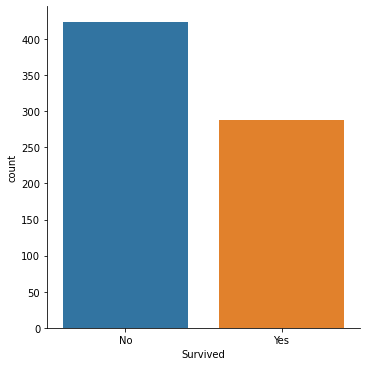

In [13]:
sns.catplot('Survived',data=df,kind='count')

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


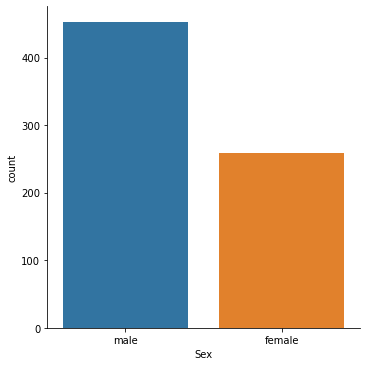

In [14]:
sns.catplot('Sex',data=df,kind='count')

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


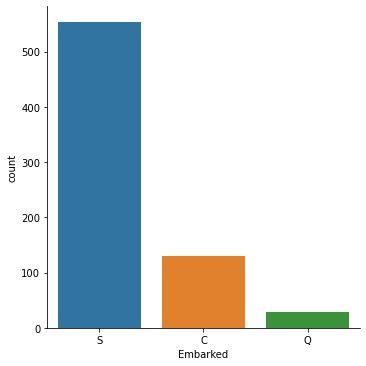

In [15]:
sns.catplot('Embarked',data=df,kind='count')

<AxesSubplot:>

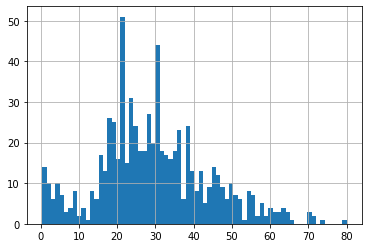

In [16]:
df['Age'].hist(bins=70)

<AxesSubplot:xlabel='Age', ylabel='Density'>

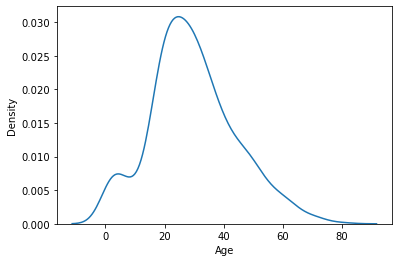

In [17]:
sns.kdeplot(df['Age'])

<AxesSubplot:>

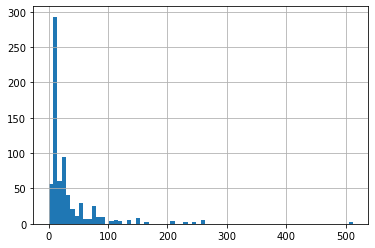

In [18]:
df['Fare'].hist(bins=70)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

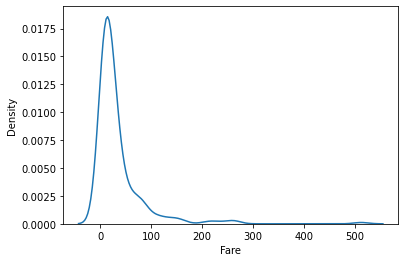

In [19]:
sns.kdeplot(df['Fare'])

In [20]:
#Visualize the correlation between Sex and Age

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


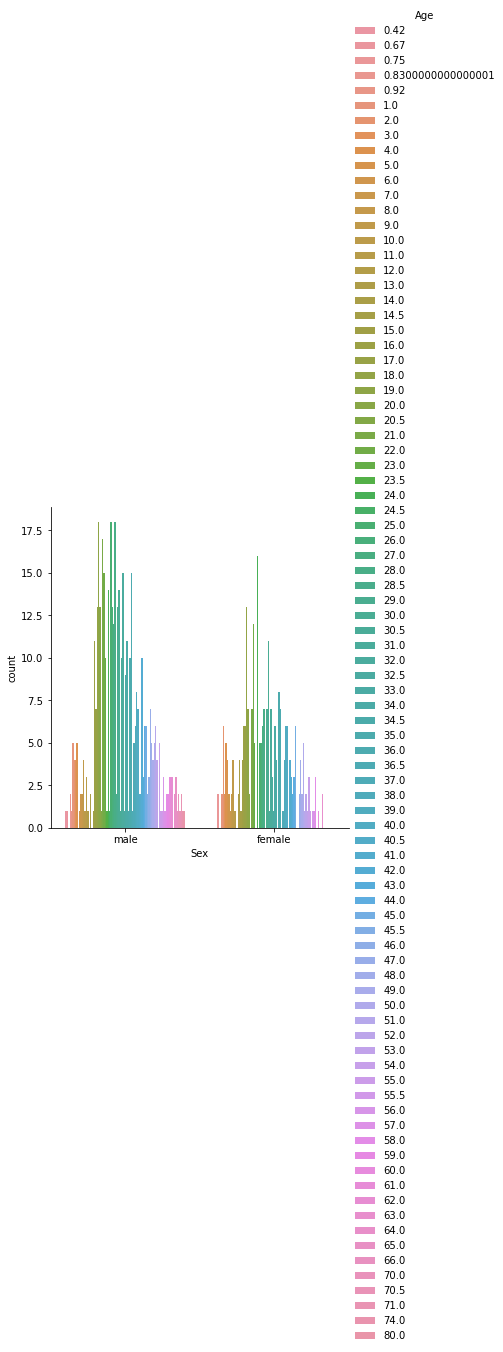

In [21]:
sns.catplot('Sex',data=df,kind='count',hue='Age')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

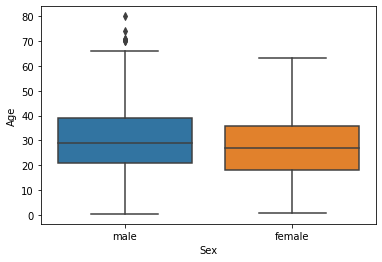

In [22]:
sns.boxplot( x=df["Sex"], y=df["Age"] )

<AxesSubplot:xlabel='Age', ylabel='Density'>

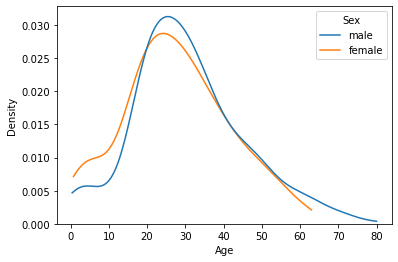

In [23]:
sns.kdeplot(data=df, x="Age", hue="Sex", cut=0, fill=False, common_norm=False, alpha=1)

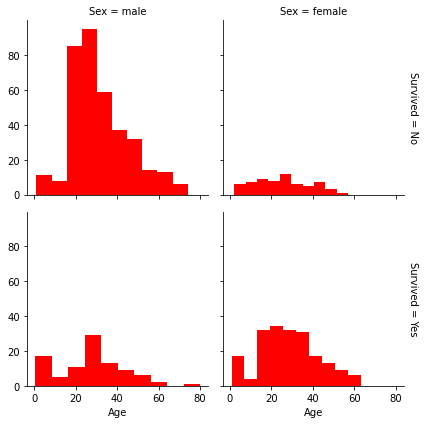

In [24]:
b = sns.FacetGrid(df, col="Sex", row="Survived", margin_titles=True)
b.map(plt.hist, "Age",color="r");

In [25]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Family          object
dtype: object

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

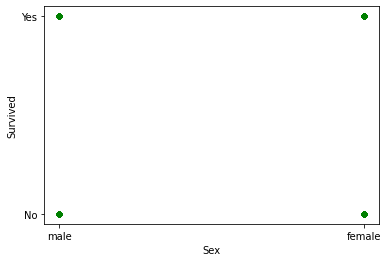

In [26]:
df.plot.scatter(x='Sex',y='Survived',c='green')

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


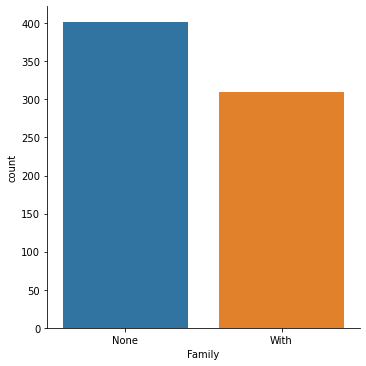

In [27]:
sns.catplot('Family',data=df,kind='count')

In [28]:
#Study of the impact of other features on the survival

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


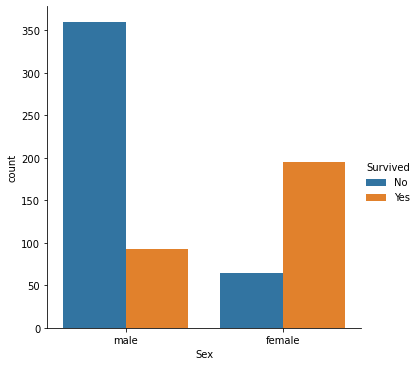

In [29]:
sns.catplot('Sex',data=df,kind='count',hue='Survived')

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


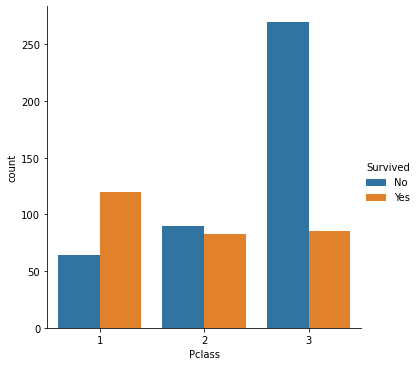

In [30]:
sns.catplot('Pclass',data=df,kind='count',hue='Survived')

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


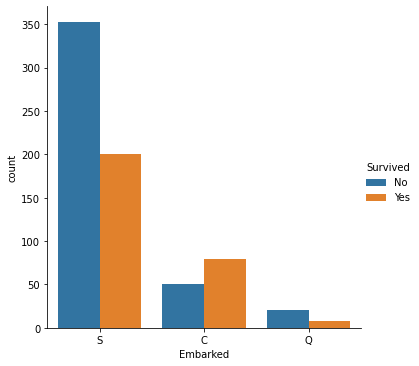

In [31]:
sns.catplot('Embarked',data=df,kind='count',hue='Survived')

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


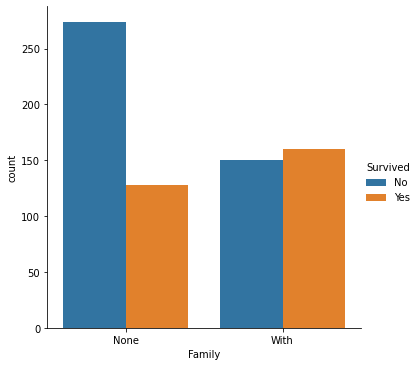

In [32]:
sns.catplot('Family',data=df,kind='count',hue='Survived')

In [33]:
#Stydy of the fucntion
def plot_correlation_map(df):
    corr = df.corr()
    s,ax = plt.subplots(figsize =(12,10))
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    s = sns.heatmap(corr,cmap = cmap,square=True,cbar_kws={'shrink':.9},ax=ax,annot = True,annot_kws = {'fontsize':12})

#It didn't work -?-

In [34]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 

In [35]:
df.groupby(['Pclass', 'Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      No         395.500000  43.695312  0.359375  0.375000  67.356313
       Yes        500.775000  35.124333  0.508333  0.433333  99.083752
2      No         451.388889  33.544444  0.344444  0.155556  20.754953
       Yes        442.566265  25.901566  0.518072  0.674699  22.248595
3      No         450.362963  26.555556  0.625926  0.433333  13.180014
       Yes        412.176471  20.646118  0.458824  0.529412  13.386421

In [36]:
df.groupby('Survived')['Pclass'].mean()

Survived
No     2.485849
Yes    1.878472
Name: Pclass, dtype: float64

In [37]:
#Making the Titles + Visualize the correlation between Title and other features : e.g Sex, Fare, Age...

In [38]:
df['Title'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
df.Title = df.Title.map(standardized_titles)

NameError: name 'standardized_titles' is not defined

In [39]:
print(df.Title.value_counts())

Mr              398
Miss            145
Mrs             107
Master           36
Dr                6
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Ms                1
Capt              1
Sir               1
the Countess      1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


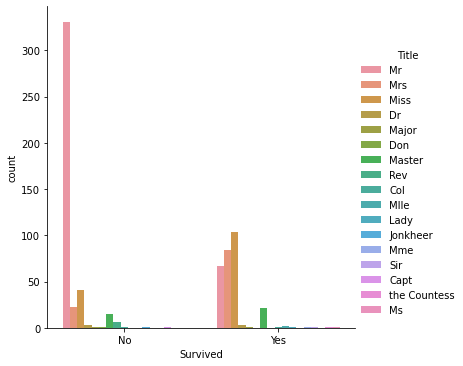

In [40]:
sns.catplot('Survived',data=df,kind='count',hue='Title')

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


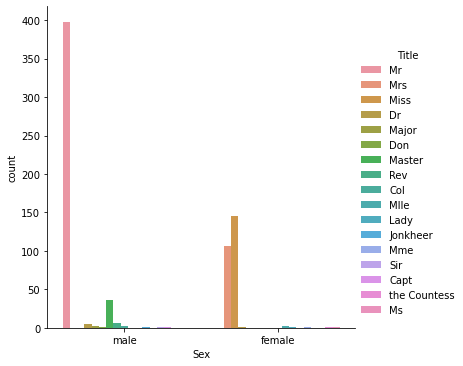

In [41]:
sns.catplot('Sex',data=df,kind='count',hue='Title')

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


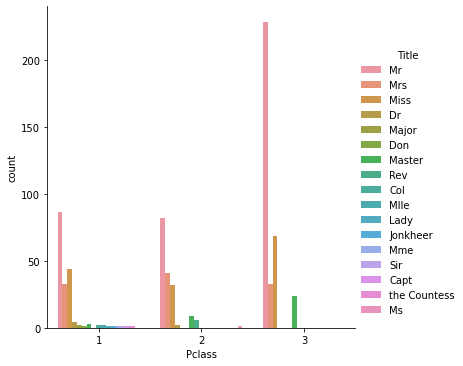

In [42]:
sns.catplot('Pclass',data=df,kind='count',hue='Title')

C:\Users\21265\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


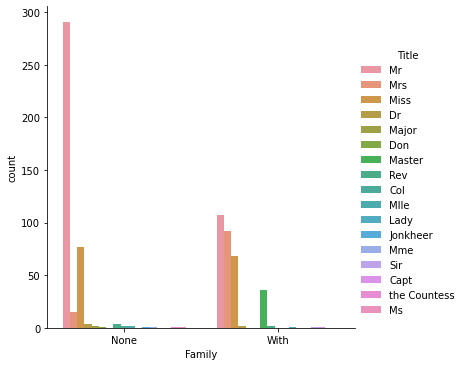

In [43]:
sns.catplot('Family',data=df,kind='count',hue='Title')